# Import & Clean Dataset

In [164]:
import pandas as pd
dataset = pd.read_csv('Amazon.csv')
dataset.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [165]:
# check for null values
dataset.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [166]:
# check for duplicate values
dataset.duplicated().sum()

0

In [167]:
# convert the rating_count from string to float
dataset['rating_count'] = dataset['rating_count'].str.replace(',', '')
dataset['rating_count'] = dataset['rating_count'].astype(float)
# Filling in missing data for rating_count
dataset['rating_count'].fillna(dataset['rating_count'].median(), inplace=True)
dataset['rating_count'].isnull().sum()

0

In [168]:
# # Remove rows with non-numeric ratings
# dataset = dataset[dataset['rating'].str.isnumeric()]
# 
# # convert the rating from string to float
# dataset['rating'] = dataset['rating'].astype(float)

In [169]:
#Changing the data type of discounted price and actual price

dataset['discounted_price'] = dataset['discounted_price'].str.replace("₹",'')
dataset['discounted_price'] = dataset['discounted_price'].str.replace(",",'')
dataset['discounted_price'] = dataset['discounted_price'].astype('float64')

dataset['actual_price'] = dataset['actual_price'].str.replace("₹",'')
dataset['actual_price'] = dataset['actual_price'].str.replace(",",'')
dataset['actual_price'] = dataset['actual_price'].astype('float64')

0       0.58
1       0.58
2       0.44
3       0.20
4       0.26
        ... 
1460    0.74
1461    0.48
1462    0.44
1463    0.75
1464    0.28
Name: discount_percentage, Length: 1465, dtype: float64

In [170]:
#Changing Datatype and values in Discount Percentage

dataset['discount_percentage'] = dataset['discount_percentage'].str.replace('%','').astype('float64')

dataset['discount_percentage'] = dataset['discount_percentage'] / 100

dataset['discount_percentage']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
720,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [171]:
#Finding unusual string in the rating column

dataset['rating'].value_counts()
dataset.query('rating == "|"')



In [172]:
#Removing the unusual string in the rating column
dataset['rating'] = dataset['rating'].str.replace('|', '4.0').astype('float64')


*New csv file with cleaned data*

In [174]:
# create a new csv file with the cleaned data
dataset.to_csv('Amazon_cleaned.csv', index=False)
dataset_cleaned = pd.read_csv('Amazon_cleaned.csv')
dataset_cleaned.head()

In [175]:
category_split = dataset['category'].str.split('|', expand=True)
category_split
category_split = category_split.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})



category_2
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
HomeAudio                                   16
Cameras&Photography                         16
HomeStorage&Organization                    16
Accessories                                 14
GeneralPurposeBatteries&BatteryChargers     14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Microphones                                  2
Electrical                                   2
Mo

In [176]:
# split the category column into 3 columns
category_split
category_split = category_split.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})
# add the 3 new columns to the new dataset
dataset_cleaned = pd.concat([dataset_cleaned, category_split], axis=1)
dataset_cleaned.head()


**1. Investigate the structure and shape of your dataset.**



*   Structure of Dataset


In [179]:
info = dataset.info()
print(info)



*   Data Shape (Rows & Columns)


In [181]:
shape = dataset.shape
print("Rows:", shape[0])
print("Columns:", shape[1])

**2. Explore the variables that the dataset has. How are they distributed?**


*   Data Types



In [183]:
types = dataset.dtypes
print(types)

* Using describe() function to print the summary statistics to check data distribution

In [157]:
summary = dataset.describe()

print(summary)


product_id              object
product_name            object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
category_1              object
category_2              object
dtype: object


**3. Compute the mean, sum, range, and other interesting statistics for numeric
columns.**

In [158]:
numeric_columns = dataset.select_dtypes(include=['float64'])

mean = numeric_columns.mean()
sum = numeric_columns.sum()
range = numeric_columns.max() - numeric_columns.min()

print("Mean Values of Columns: ")
print(mean)

print("\nSum Values of Columns: ")
print(sum)

print("\nRange of Columns: ")
print(range)

       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1465.000000   
mean        3125.310874    5444.990635             0.476915     4.096519   
std         6944.304394   10874.826864             0.216359     0.291585   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000             0.320000     4.000000   
50%          799.000000    1650.000000             0.500000     4.100000   
75%         1999.000000    4295.000000             0.630000     4.300000   
max        77990.000000  139900.000000             0.940000     5.000000   

        rating_count  
count    1465.000000  
mean    18277.634812  
std     42727.398216  
min         2.000000  
25%      1191.000000  
50%      5179.000000  
75%     17325.000000  
max    426973.000000  


**4. Explore distributions of numeric columns using histograms etc.**


Histogram 1 - Discounted Price Distribution

*   Column: 'discounted_price'



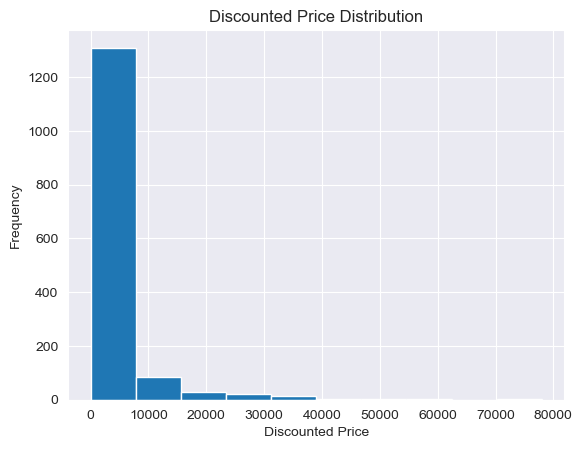

<Figure size 800x500 with 0 Axes>

In [93]:
import matplotlib.pyplot as plt

plt.hist(dataset['discounted_price'])
plt.title("Discounted Price Distribution")
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

Histogram 2 - Actual Price Distribution

*   Column: 'actual_price'



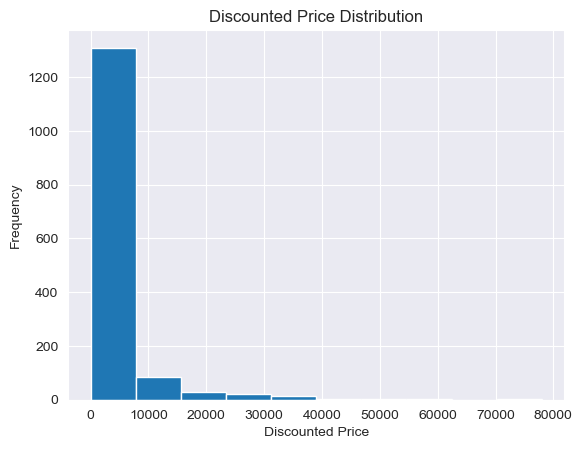

<Figure size 800x500 with 0 Axes>

In [160]:
plt.hist(dataset['actual_price'])
plt.title("Actual Price Distribution")
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

Histogram 3 - Rating Count Distribution

*   Column: 'rating_count'



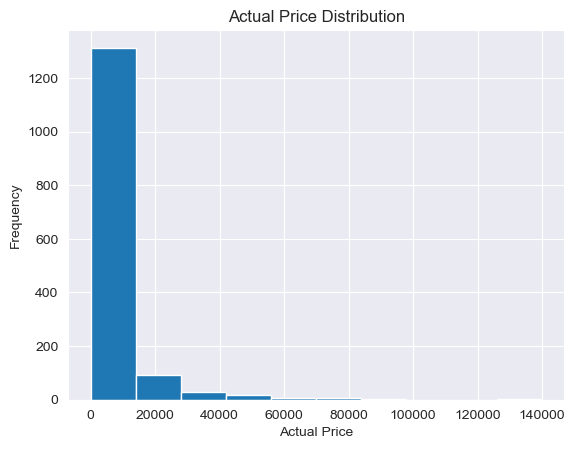

<Figure size 800x500 with 0 Axes>

In [161]:
plt.hist(dataset['rating_count'])
plt.title("Rating Count Distribution")
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

Bar Chart 1 - Rating Count per Category

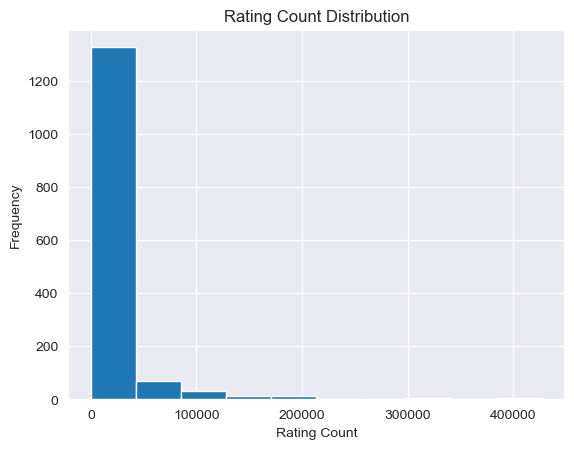

<Figure size 800x500 with 0 Axes>

In [162]:
categories = dataset['category'].unique()
# add rating count  on the category to a list
rating_count = []
for category in categories:
    rating_count.append(dataset[dataset['category'] == category]['rating_count'].sum())
# plot the bar graph
plt.bar(categories, rating_count)
plt.title("Rating Count per Category")
plt.xlabel('Category')
plt.ylabel('Rating Count')
plt.xticks(rotation=90)
plt.figure(figsize=(8,5))

plt.show()

# print the rating count for each category based on the dataset
print("Rating Count per Category: ")
print(rating_count)


Bar Chart 2 - Category Popularity Based on Rating Counts

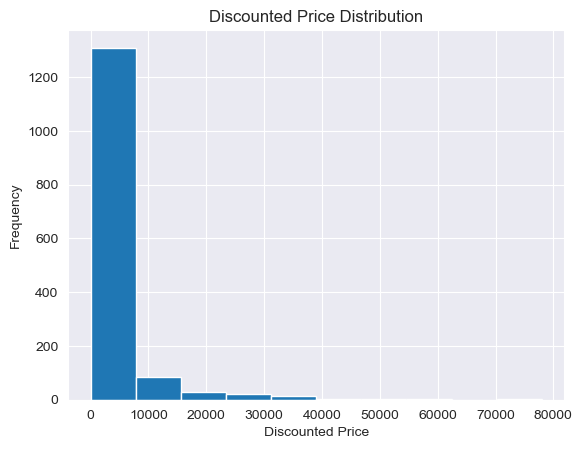

<Figure size 800x500 with 0 Axes>

In [189]:
# append ratings to a list
ratings = []
for category in categories:
    ratings.append(dataset[dataset['category'] == category]['rating'].sum())
    
# round off the ratings to nearest integer
ratings = [round(rating) for rating in ratings]
# count the number of ratings from 1 to 5
rating_count = [ratings.count(1), ratings.count(2), ratings.count(3), ratings.count(4), ratings.count(5)]
print("Rating Count: ")
print(rating_count)
# plot the bar graph
plt.bar([1,2,3,4,5], rating_count)
plt.title("Category Popularity Based on Rating Counts")
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.figure(figsize=(8,5))

plt.show()



Scatter Plot 1 - Product Popularity by Rating and Rating Count

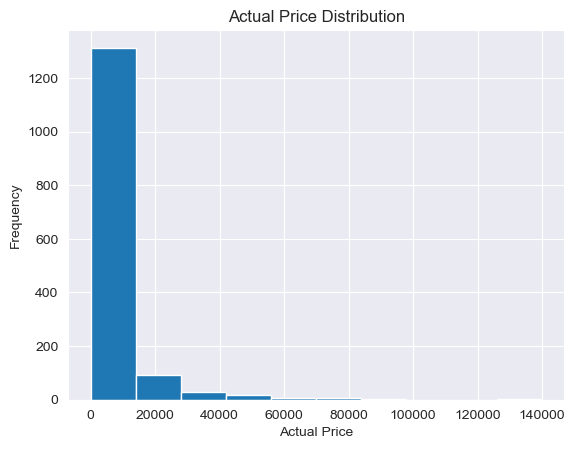

<Figure size 800x500 with 0 Axes>

In [190]:
plt.title("Product Popularity by Rating and Rating Count")
plt.xlabel('Rating')
plt.ylabel('Rating Count')

plt.scatter(dataset['rating'],dataset['rating_count'])
plt.show()

Scatter Plot 2 - Discount Percentage vs. Rating

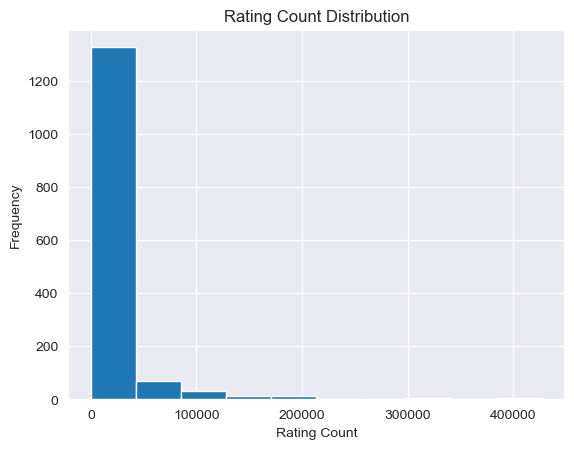

<Figure size 800x500 with 0 Axes>

In [191]:
plt.scatter(dataset['discount_percentage'], dataset['rating'], alpha=0.5)  # Alpha controls the transparency of points
plt.title("Discount Percentage vs. Rating")
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
tick_positions = [10, 20, 30, 40, 50, 60, 70]
tick_labels = ['10%', '20%', '30%', '40%', '50%', '60%', '70%']
plt.xticks(tick_positions, tick_labels)


plt.show()

**Create a visualization for each research question that might provide a useful answer.**

**Research Question 1**
*   Heatmap 1 - Correlations Among Key Product Attributes


In [ ]:
import seaborn as sns

# List the attributes you want to assess
attributes = ['discounted_price', 'rating', 'actual_price', 'rating_count']

# Calculate the correlations among the specified attributes
correlations = dataset[attributes].corr(numeric_only=True)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlations Among Key Product Attributes")
plt.show()


**Research Question 3**
*   Heatmap 2 - User Behavior Heatmap

In [ ]:
# You may need to prepare a user behavior matrix
# Replace 'user_behavior_matrix' with the actual matrix or data
user_behavior_matrix = pd.crosstab(dataset['user_id'], dataset['product_id'])

plt.figure(figsize=(10, 6))
plt.imshow(user_behavior_matrix, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('User Behavior Heatmap')
plt.show()
